In [2]:
import math
import numpy as np
import matplotlib.pyplot as plt
##Input Voltage: 5V +- V_ripple
##Output Voltage: variable w.r.t R2 || R1 voltage division network where R2 is digital pot

#Func
def R2_ret(R_pot, N):
    return (R_pot/63)*N
    

#Const:
thou = pow(10,3)
V_in = 5
V_rip = V_in*0.03 #? 
V_start = 3
V_stop = 2.2
V_EN = 1.8 #From datasheet
I_EN = 10 * math.pow(10,-6)
f = 300 * thou


R_4 = (V_start - V_stop)/I_EN
R_5 = (V_EN * R_4)/(V_start - V_EN)
#################################



print(f"R4 = {R_4/1000:.2f}") #80 KOhms
print(f"R5 = {R_5/1000:.2}") #120 KOhms



R4 = 80.00
R5 = 1.2e+02


C:\Users\shaxz\AppData\Local\Temp\ipykernel_32264\2414684085.py:5: RuntimeWarning: divide by zero encountered in divide
  V_out = (R1 + R2)/R2 * 0.8


Text(0.5, 1.0, 'Output Voltage vs Digital Potentiometer Resistance')

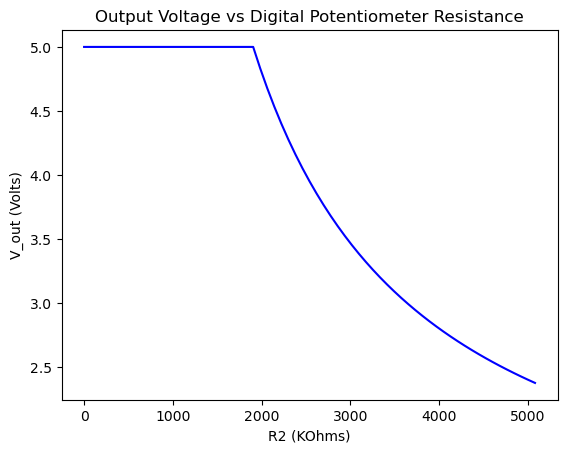

In [8]:
R1 = 10000
R_pot = 5000
N = np.arange(0, 65)
R2 = R2_ret(R_pot,N)
V_out = (R1 + R2)/R2 * 0.8
V_out = np.minimum(V_out,V_in)
plt.plot(R2, V_out, label='V_out vs R2', color='blue')
plt.xlabel('R2 (KOhms)')
plt.ylabel('V_out (Volts)')

plt.title('Output Voltage vs Digital Potentiometer Resistance')

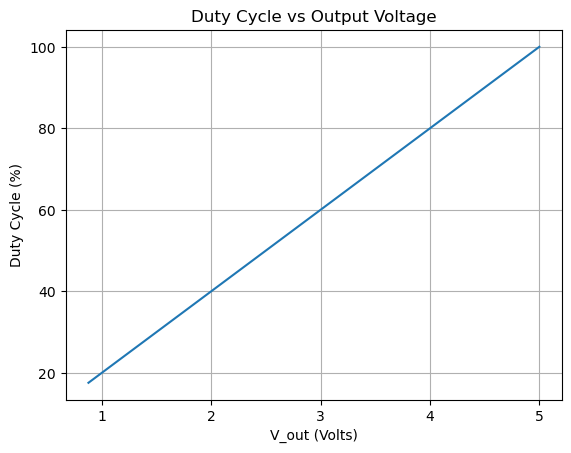

In [14]:
###Duty Cycle Calculation
R_L = 10 #100R
D_on = abs((V_out)/(V_in - (R_L * I_out)))*100
plt.plot(V_out,D_on)
plt.xlabel('V_out (Volts)')
plt.ylabel('Duty Cycle (%)')
plt.title('Duty Cycle vs Output Voltage')
plt.grid()



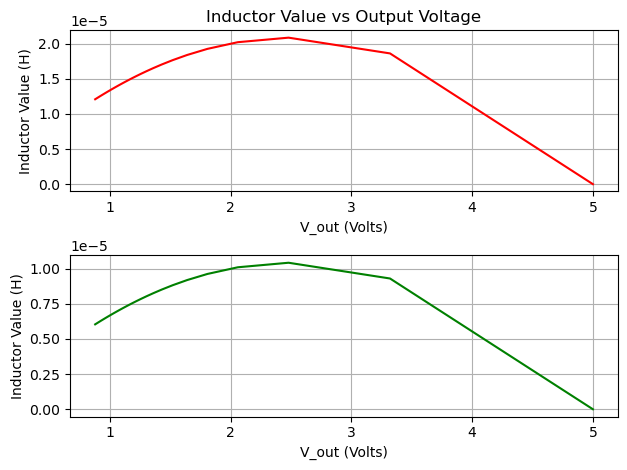

In [8]:
#Max output current: 3A -> doesn't really matter 
#L value should have current rating relative to I_peak and low DCR
I_out = 1 #A
Rip = 0.4 #30% ripple current
del_IL_20 = I_out * 0.20
del_IL_50 = I_out * 0.50
del_IL_R = I_out * Rip
#del_IL = (V_in-V_out)/L * (V_out/V_in) * (1/f)
L_20 = ((V_in - V_out) * V_out)/(del_IL_20 * V_in * f)
L_50 = ((V_in - V_out) * V_out)/(del_IL_50 * V_in * f)
L_rip = ((V_in - V_out) * V_out)/(del_IL_R * V_in * f)

plt.subplot(2, 1, 1)
plt.plot(V_out, L_20, label='L for 20% ripple', color='red')
plt.title('Inductor Value vs Output Voltage')
plt.xlabel('V_out (Volts)')
plt.ylabel('Inductor Value (H)')
plt.grid()

plt.subplot(2, 1, 2)
plt.xlabel('V_out (Volts)')
plt.ylabel('Inductor Value (H)')
plt.grid()
plt.tight_layout()
plt.plot(V_out, L_rip, label='L for 50% ripple', color='green')



In [ ]:
#Capacitor Selection


0.0031372757065285094


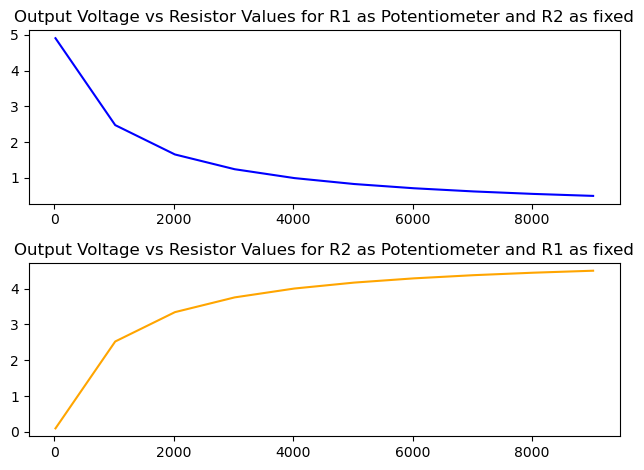

In [4]:
import numpy as np
import matplotlib.pyplot as plt
V_in = 5
R_2A = 1000  # Ohms
R_1A = np.arange(20, 10000, 1000)  # Ohms
V_outt = V_in*R_2A/(R_2A+R_1A)

R_2 = np.arange(20, 10000, 1000) 
R_1 = 1000  # Ohms
V_outtB  = V_in*R_2/(R_2+R_1)

plt.subplot(2, 1, 1)
plt.plot(R_1A, V_outt, label='V_out vs R1A', color='blue')
plt.title('Output Voltage vs Resistor Values for R1 as Potentiometer and R2 as fixed')
plt.tight_layout()

plt.subplot(2, 1, 2)
plt.plot(R_2, V_outtB, label='V_out vs R2', color='orange')
plt.title('Output Voltage vs Resistor Values for R2 as Potentiometer and R1 as fixed')
plt.tight_layout()


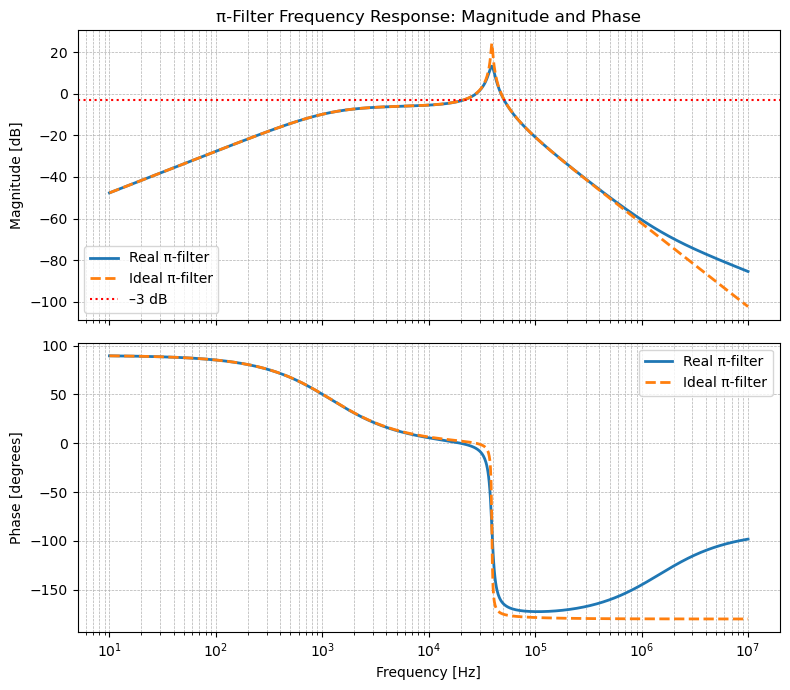

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Component values
C1 = C2 = 2.2e-6             # 2.2 µF
ESR_C = 0.05                 # ESR (Ohms)
L = 15e-6                    # 15 µH
R_L = 0.19                   # Inductor series resistance (Ohms)
R_load = 30                  # Load resistance (Ohms)

# Frequency sweep
f = np.logspace(1, 7, 1000)  # 10 Hz to 10 MHz
w = 2 * np.pi * f
s = 1j * w

# Ideal component impedances
Z_C = 1 / (s * C1)
Z_L_ideal = s * L

# Real-world impedances
Z_C1 = Z_C + ESR_C
Z_C2 = Z_C + ESR_C
Z_L = s * L + R_L

# Real transfer function: Vout / Vin
Z_p_real = 1 / (1 / Z_C2 + 1 / R_load)
Z_tot_real = Z_C1 + Z_L + Z_p_real
H_real = Z_p_real / Z_tot_real

# Ideal transfer function
Z_p_ideal = 1 / (1 / Z_C + 1 / R_load)
Z_tot_ideal = Z_C + Z_L_ideal + Z_p_ideal
H_ideal = Z_p_ideal / Z_tot_ideal

# Magnitude and phase
Hdb_real = 20 * np.log10(np.abs(H_real))
Hdb_ideal = 20 * np.log10(np.abs(H_ideal))
phase_real = np.angle(H_real, deg=True)
phase_ideal = np.angle(H_ideal, deg=True)

# Plotting subfigures
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 7), sharex=True)

# Magnitude plot
ax1.semilogx(f, Hdb_real, label='Real π-filter', linewidth=2)
ax1.semilogx(f, Hdb_ideal, '--', label='Ideal π-filter', linewidth=2)
ax1.axhline(-3, color='red', linestyle=':', label='–3 dB')
ax1.set_ylabel('Magnitude [dB]')
ax1.set_title('π-Filter Frequency Response: Magnitude and Phase')
ax1.grid(True, which='both', linestyle='--', linewidth=0.5)
ax1.legend(loc='best')

# Phase plot
ax2.semilogx(f, phase_real, label='Real π-filter', linewidth=2)
ax2.semilogx(f, phase_ideal, '--', label='Ideal π-filter', linewidth=2)
ax2.set_xlabel('Frequency [Hz]')
ax2.set_ylabel('Phase [degrees]')
ax2.grid(True, which='both', linestyle='--', linewidth=0.5)
ax2.legend(loc='best')

plt.tight_layout()
plt.show()
